In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [118]:
os.chdir('A:\Imarticus\python project')

In [119]:
data = pd.read_csv('data.txt',delimiter="\t")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [234]:
data.shape

(855969, 73)

In [121]:
len(data.columns)

73

In [122]:
df=pd.DataFrame(data.isnull().sum())
df['Percentage']=0
df.columns=['Miss','Percentage']
df['Percentage']=df.apply(lambda row: (row.Miss/len(data))*100, axis=1)

In [123]:
df.sort_values('Percentage',ascending=False)[df.Percentage>30]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Miss,Percentage
dti_joint,855529,99.948596
annual_inc_joint,855527,99.948363
verification_status_joint,855527,99.948363
il_util,844360,98.643759
mths_since_rcnt_il,843035,98.488964
open_acc_6m,842681,98.447607
open_rv_12m,842681,98.447607
open_il_24m,842681,98.447607
total_bal_il,842681,98.447607
open_rv_24m,842681,98.447607


In [124]:
df.sort_values('Percentage',ascending=False)[df.Percentage>30].index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Index(['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'il_util',
       'mths_since_rcnt_il', 'open_acc_6m', 'open_rv_12m', 'open_il_24m',
       'total_bal_il', 'open_rv_24m', 'open_il_6m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'open_il_12m', 'desc',
       'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_since_last_delinq'],
      dtype='object')

In [125]:
cols_to_drop=['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'il_util',
       'mths_since_rcnt_il', 'open_acc_6m', 'open_rv_12m', 'open_il_24m',
       'total_bal_il', 'open_rv_24m', 'open_il_6m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'open_il_12m', 'desc',
       'mths_since_last_record', 'mths_since_last_major_derog',
       'mths_since_last_delinq']

In [126]:
data1=data.drop(cols_to_drop,axis=1).copy()

In [127]:
data1.shape

(855969, 52)

In [128]:
data1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                        2
grade                       7
sub_grade                  35
emp_title              290912
emp_length                 11
home_ownership              6
verification_status         3
issue_d                   103
pymnt_plan                  2
purpose                    14
title                   60991
zip_code                  931
addr_state                 51
earliest_cr_line          697
initial_list_status         2
last_pymnt_d               97
next_pymnt_d                3
last_credit_pull_d        102
application_type            2
dtype: int64

# number of unique values in emp_title and title is too high...so let's drop them


In [129]:
data1=data1.drop(['emp_title','title'],axis=1).copy()

In [130]:
data1.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [131]:
data1.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

loan_amnt                       1368
funded_amnt                     1368
funded_amnt_inv                 8818
int_rate                         520
installment                    67349
annual_inc                     48163
dti                             4074
delinq_2yrs                       29
inq_last_6mths                     9
open_acc                          77
pub_rec                           31
revol_bal                      72779
revol_util                      1338
total_acc                        134
out_prncp                     236739
out_prncp_inv                 254328
total_pymnt                   494607
total_pymnt_inv               494744
total_rec_prncp               250385
total_rec_int                 317683
total_rec_late_fee              5386
recoveries                     22627
collection_recovery_fee        20529
last_pymnt_amnt               230321
collections_12_mths_ex_med        12
policy_code                        1
acc_now_delinq                     8
t

# drop policy_code as it has just 1 variable and check inq_last_6mths, open_acc, pub_rec, acc_now_delinq

In [132]:
data1=data1.drop('policy_code',axis=1).copy()

In [133]:
df1=data1[['inq_last_6mths','open_acc','pub_rec','acc_now_delinq']]

In [134]:
(df1.inq_last_6mths.unique())

array([1., 5., 2., 0., 3., 4., 6., 7., 8.])

In [135]:
data1.id.head(5)

0    1077501
1    1077430
2    1077175
3    1076863
4    1075358
Name: id, dtype: int64

In [136]:
data1=data1.drop('id',axis=1)

In [137]:
data1.shape

(855969, 48)

In [138]:
data1.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

member_id      855969
default_ind         2
dtype: int64

In [139]:
data1=data1.drop('member_id',axis=1).copy()

In [140]:
data1.shape

(855969, 47)

In [141]:
df1.head(20)

,inq_last_6mths,open_acc,pub_rec,acc_now_delinq
0,1.0,3.0,0.0,0.0
1,5.0,3.0,0.0,0.0
2,2.0,2.0,0.0,0.0
3,1.0,10.0,0.0,0.0
4,0.0,15.0,0.0,0.0
5,3.0,9.0,0.0,0.0
6,1.0,7.0,0.0,0.0
7,2.0,4.0,0.0,0.0
8,2.0,11.0,0.0,0.0
9,0.0,2.0,0.0,0.0


In [142]:
df1.acc_now_delinq.unique()

array([ 0.,  1.,  2.,  3.,  5.,  4.,  6., 14.])

In [143]:
#data1.to_csv('data_n.csv')

In [144]:
df1.open_acc.unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42., 40.,  1., 37., 45., 49., 53., 51., 43.,  0., 62., 46., 48.,
       50., 52., 47., 58., 55., 84., 75., 54., 76., 61., 65., 67., 57.,
       66., 68., 70., 60., 56., 82., 63., 59., 64., 79., 74., 90.])

In [145]:
df1.pub_rec.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  9.,  8.,  7., 11., 49., 10.,
       54., 12., 18., 19., 16., 15., 14., 40., 63., 13., 21., 34., 17.,
       23., 26., 28., 86., 22.])

In [146]:
from scipy import stats

In [147]:
stats.mode(df1['open_acc'])

ModeResult(mode=array([9.]), count=array([77533]))

In [148]:
stats.mode(df1['acc_now_delinq'])

ModeResult(mode=array([0.]), count=array([852039]))

In [149]:
import matplotlib.pyplot as plt

In [150]:
df1.acc_now_delinq.value_counts()

0.0     852039
1.0       3693
2.0        198
3.0         28
4.0          6
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64

# acc_now_delinq    The number of accounts on which the borrower is now delinquent.

In [151]:
#acc_now_delinq is of object type

In [152]:
df1.inq_last_6mths.describe()

count    855969.000000
mean          0.680915
std           0.964033
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: inq_last_6mths, dtype: float64

In [153]:
len(df1.inq_last_6mths.unique())

9

In [154]:
#inq_last_12m    Number of credit inquiries in past 12 months #is of object type

In [155]:
data1.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

default_ind    2
dtype: int64

In [156]:
#default_ind is of object type

0    809502
1     46467
Name: default_ind, dtype: int64

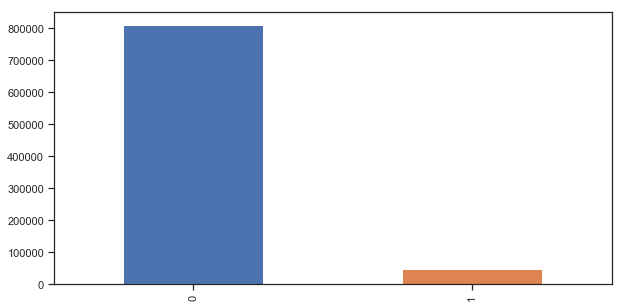

In [157]:
data1.default_ind.value_counts().plot.bar()
data1.default_ind.value_counts()

In [158]:
data1.groupby( ['zip_code','addr_state',] ).count()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  \
zip_code addr_state                                                            
007xx    FL                  1            1                1     1         1   
         NJ                  2            2                2     2         2   
         PA                  1            1                1     1         1   
008xx    VA                  3            3                3     3         3   
010xx    CT                  1            1                1     1         1   
         MA               1415         1415             1415  1415      1415   
011xx    CT                  1            1                1     1         1   
         MA                389          389              389   389       389   
012xx    MA                334          334              334   334       334   
013xx    MA                235          235              235   235       235   
014xx    KS                  1            1                1     1         1   
         MA                583          583              583   583       583   
015xx    MA               1297         1297             1297  1297      1297   
016xx    MA                496          496              496   496       496   
         WA                  1            1                1     1         1   
017xx    CA                  1            1                1     1         1   
         MA               1051         1051             1051  1051      1051   
         MI                  1            1                1     1         1   
         NY                  1            1                1     1         1   
018xx    MA               2140         2140             2140  2140      2140   
         RI                  1            1                1     1         1   
019xx    MA               1515         1515             1515  1515      1515   
         ME                  1            1                1     1         1   
020xx    MA               1171         1171             1171  1171      1171   
         RI                  2            2                2     2         2   
021xx    FL                  1            1                1     1         1   
         MA               4380         4380             4380  4380      4380   
         MD                  4            4                4     4         4   
         ME                  1            1                1     1         1   
         NY                  2            2                2     2         2   
...                        ...          ...              ...   ...       ...   
983xx    VA                  1            1                1     1         1   
         WA               2133         2133             2133  2133      2133   
         WV                  1            1                1     1         1   
984xx    CA                  1            1                1     1         1   
         WA               1092         1092             1092  1092      1092   
985xx    MT                  1            1                1     1         1   
         WA               1210         1210             1210  1210      1210   
986xx    OR                  1            1                1     1         1   
         WA               1717         1717             1717  1717      1717   
988xx    WA                500          500              500   500       500   
989xx    AZ                  1            1                1     1         1   
         WA                638          638              638   638       638   
990xx    AK                  1            1                1     1         1   
         CA                  2            2                2     2         2   
         WA                351          351              351   351       351   
991xx    CA                  1            1                1     1         1   
         WA                237          237              237   237       237   
992xx    AK          

In [159]:
#unique zip_code

In [160]:
data1['addr_state'].value_counts()

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64

In [161]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [162]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)


In [163]:
data1.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list

In [164]:
data1['default_ind']=data1['default_ind'].astype(str)
data1['acc_now_delinq']=data1['acc_now_delinq'].astype(str)
#data1['inq_last_12m']=data1['inq_last_12m'].astype(str)


In [167]:
data1.inq_last_6mths=data1.inq_last_6mths.astype(str)

In [168]:
data1.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                 object
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list

In [169]:
data1.shape

(855969, 47)

In [170]:
data1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
issue_d                103
pymnt_plan               2
purpose                 14
zip_code               931
addr_state              51
earliest_cr_line       697
inq_last_6mths           9
initial_list_status      2
last_pymnt_d            97
next_pymnt_d             3
last_credit_pull_d     102
application_type         2
acc_now_delinq           8
default_ind              2
dtype: int64

In [171]:
data1=data1.drop(['zip_code','earliest_cr_line'],axis=1)

In [172]:
data1.shape

(855969, 45)

In [173]:
data1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
issue_d                103
pymnt_plan               2
purpose                 14
addr_state              51
inq_last_6mths           9
initial_list_status      2
last_pymnt_d            97
next_pymnt_d             3
last_credit_pull_d     102
application_type         2
acc_now_delinq           8
default_ind              2
dtype: int64

In [174]:
data1[['issue_d','last_credit_pull_d']].head(20)

,issue_d,last_credit_pull_d
0,Dec-2011,Jan-2016
1,Dec-2011,Sep-2013
2,Dec-2011,Jan-2016
3,Dec-2011,Jan-2015
4,Dec-2011,Jan-2016
5,Dec-2011,Sep-2015
6,Dec-2011,Jan-2016
7,Dec-2011,Dec-2014
8,Dec-2011,Aug-2012
9,Dec-2011,Mar-2013


In [175]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
corr=data1.corr()
corr.style.background_gradient()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1,0.999265,0.997601,0.142966,0.94487,0.335209,0.0201887,-0.000738747,0.198926,-0.0821989,0.337489,0.119635,0.222084,0.639784,0.639786,0.479612,0.480328,0.39588,0.537586,0.0259658,0.075513,0.0551347,0.233596,-0.0170416,-0.00427204,0.32913,0.312072
funded_amnt,0.999265,1,0.998485,0.143116,0.945903,0.335002,0.0205827,-0.000424113,0.199432,-0.0818585,0.337405,0.120147,0.222039,0.641706,0.641709,0.47829,0.479172,0.394669,0.536533,0.0255787,0.0750761,0.0548982,0.233134,-0.0168867,-0.00427201,0.329128,0.312071
funded_amnt_inv,0.997601,0.998485,1,0.143374,0.944149,0.334356,0.0214893,4.97393e-05,0.200055,-0.0810077,0.33687,0.120931,0.222258,0.644011,0.644023,0.4746,0.478589,0.39101,0.534517,0.0230911,0.0737372,0.0530823,0.232029,-0.0165556,-0.00427095,0.329152,0.312107
int_rate,0.142966,0.143116,0.143374,1,0.130468,-0.0738247,0.078454,0.0553997,-0.0110909,0.0525958,-0.0353445,0.271687,-0.0394819,0.0339334,0.0337896,0.173387,0.174453,0.0592978,0.446517,0.0507426,0.110848,0.0743596,0.107346,0.0128406,0.001129,-0.09143,-0.165533
installment,0.94487,0.945903,0.944149,0.130468,1,0.328578,0.0139091,0.00722386,0.183817,-0.0711138,0.320017,0.131928,0.199872,0.53984,0.539835,0.520613,0.521332,0.455444,0.502038,0.0357285,0.0769313,0.0571801,0.243246,-0.0145652,-0.00354003,0.298352,0.286857
annual_inc,0.335209,0.335002,0.334356,-0.0738247,0.328578,1,-0.0868209,0.0477494,0.139429,-0.00890941,0.298569,0.0367529,0.188651,0.211549,0.211591,0.163226,0.163275,0.152245,0.130367,0.00986365,0.00761337,0.00680473,0.0926617,-0.00378938,0.00100485,0.422618,0.271059
dti,0.0201887,0.0205827,0.0214893,0.078454,0.0139091,-0.0868209,1,-0.00267732,0.142068,-0.0227168,0.0671187,0.0866485,0.106266,0.0580568,0.0580207,-0.0405372,-0.0395632,-0.0508548,0.00875017,-0.00624486,0.00171937,0.00292287,-0.0286013,-0.00011718,-0.00199542,-0.00713257,0.0324302
delinq_2yrs,-0.000738747,-0.000424113,4.97393e-05,0.0553997,0.00722386,0.0477494,-0.00267732,1,0.0515021,-0.011081,-0.0318066,-0.0162994,0.121978,0.0308842,0.0308735,-0.031777,-0.0313459,-0.0380677,0.00137984,0.0139924,-0.000252273,0.00146676,-0.0188053,0.0630186,0.000153776,0.0646178,-0.0405745
open_acc,0.198926,0.199432,0.200055,-0.0110909,0.183817,0.139429,0.142068,0.0515021,1,-0.0261223,0.225858,-0.144959,0.69485,0.17105,0.171053,0.0434516,0.0445517,0.0321148,0.0617247,-0.00995672,0.00195677,0.0039905,0.0291297,0.00999768,7.05885e-05,0.244465,0.325179
pub_rec,-0.0821989,-0.0818585,-0.0810077,0.0525958,-0.0711138,-0.00890941,-0.0227168,-0.011081,-0.0261223,1,-0.101235,-0.0790498,0.0123,-0.00797785,-0.00797559,-0.0879335,-0.0872986,-0.084596,-0.0598678,-0.0118713,-0.0146015,-0.00896342,-0.0342151,0.0208743,0.00681564,-0.075956,-0.100227


In [176]:
data1[['loan_amnt','funded_amnt','funded_amnt_inv']]

,loan_amnt,funded_amnt,funded_amnt_inv
0,5000.0,5000.0,4975.000000
1,2500.0,2500.0,2500.000000
2,2400.0,2400.0,2400.000000
3,10000.0,10000.0,10000.000000
4,3000.0,3000.0,3000.000000
5,5000.0,5000.0,5000.000000
6,7000.0,7000.0,7000.000000
7,3000.0,3000.0,3000.000000
8,5600.0,5600.0,5600.000000
9,5375.0,5375.0,5350.000000


In [177]:
data1=data1.drop(['funded_amnt','funded_amnt_inv'],axis=1) #loan_amnt,'funded_amnt','funded_amnt_inv'..all are same

In [178]:
data1.shape

(855969, 43)

In [179]:
data1[['loan_amnt','installment']]

,loan_amnt,installment
0,5000.0,162.87
1,2500.0,59.83
2,2400.0,84.33
3,10000.0,339.31
4,3000.0,67.79
5,5000.0,156.46
6,7000.0,170.08
7,3000.0,109.43
8,5600.0,152.39
9,5375.0,121.45


In [180]:
#corr = data1.corr()['TARGET'].sort_values()


In [181]:
corr=data1.corr()['loan_amnt'].sort_values(ascending=False)


In [182]:
corr

loan_amnt                     1.000000
installment                   0.944870
out_prncp_inv                 0.639786
out_prncp                     0.639784
total_rec_int                 0.537586
total_pymnt_inv               0.480328
total_pymnt                   0.479612
total_rec_prncp               0.395880
revol_bal                     0.337489
annual_inc                    0.335209
tot_cur_bal                   0.329130
total_rev_hi_lim              0.312072
last_pymnt_amnt               0.233596
total_acc                     0.222084
open_acc                      0.198926
int_rate                      0.142966
revol_util                    0.119635
recoveries                    0.075513
collection_recovery_fee       0.055135
total_rec_late_fee            0.025966
dti                           0.020189
delinq_2yrs                  -0.000739
tot_coll_amt                 -0.004272
collections_12_mths_ex_med   -0.017042
pub_rec                      -0.082199
Name: loan_amnt, dtype: f

In [183]:
data1=data1.drop('installment',axis=1)

In [184]:
data1.select_dtypes(['float64','int64']).apply(pd.Series.nunique, axis = 0)

loan_amnt                       1368
int_rate                         520
annual_inc                     48163
dti                             4074
delinq_2yrs                       29
open_acc                          77
pub_rec                           31
revol_bal                      72779
revol_util                      1338
total_acc                        134
out_prncp                     236739
out_prncp_inv                 254328
total_pymnt                   494607
total_pymnt_inv               494744
total_rec_prncp               250385
total_rec_int                 317683
total_rec_late_fee              5386
recoveries                     22627
collection_recovery_fee        20529
last_pymnt_amnt               230321
collections_12_mths_ex_med        12
tot_coll_amt                   10138
tot_cur_bal                   322286
total_rev_hi_lim               20793
dtype: int64

In [185]:
data1.corr()['int_rate'].sort_values(ascending=False)

int_rate                      1.000000
total_rec_int                 0.446517
revol_util                    0.271687
total_pymnt_inv               0.174453
total_pymnt                   0.173387
loan_amnt                     0.142966
recoveries                    0.110848
last_pymnt_amnt               0.107346
dti                           0.078454
collection_recovery_fee       0.074360
total_rec_prncp               0.059298
delinq_2yrs                   0.055400
pub_rec                       0.052596
total_rec_late_fee            0.050743
out_prncp                     0.033933
out_prncp_inv                 0.033790
collections_12_mths_ex_med    0.012841
tot_coll_amt                  0.001129
open_acc                     -0.011091
revol_bal                    -0.035344
total_acc                    -0.039482
annual_inc                   -0.073825
tot_cur_bal                  -0.091430
total_rev_hi_lim             -0.165533
Name: int_rate, dtype: float64

In [186]:
data1.corr()['annual_inc'].sort_values(ascending=False)

annual_inc                    1.000000
tot_cur_bal                   0.422618
loan_amnt                     0.335209
revol_bal                     0.298569
total_rev_hi_lim              0.271059
out_prncp_inv                 0.211591
out_prncp                     0.211549
total_acc                     0.188651
total_pymnt_inv               0.163275
total_pymnt                   0.163226
total_rec_prncp               0.152245
open_acc                      0.139429
total_rec_int                 0.130367
last_pymnt_amnt               0.092662
delinq_2yrs                   0.047749
revol_util                    0.036753
total_rec_late_fee            0.009864
recoveries                    0.007613
collection_recovery_fee       0.006805
tot_coll_amt                  0.001005
collections_12_mths_ex_med   -0.003789
pub_rec                      -0.008909
int_rate                     -0.073825
dti                          -0.086821
Name: annual_inc, dtype: float64

In [187]:
data1.corr()['dti'].sort_values(ascending=False)

dti                           1.000000
open_acc                      0.142068
total_acc                     0.106266
revol_util                    0.086649
int_rate                      0.078454
revol_bal                     0.067119
out_prncp                     0.058057
out_prncp_inv                 0.058021
total_rev_hi_lim              0.032430
loan_amnt                     0.020189
total_rec_int                 0.008750
collection_recovery_fee       0.002923
recoveries                    0.001719
collections_12_mths_ex_med   -0.000117
tot_coll_amt                 -0.001995
delinq_2yrs                  -0.002677
total_rec_late_fee           -0.006245
tot_cur_bal                  -0.007133
pub_rec                      -0.022717
last_pymnt_amnt              -0.028601
total_pymnt_inv              -0.039563
total_pymnt                  -0.040537
total_rec_prncp              -0.050855
annual_inc                   -0.086821
Name: dti, dtype: float64

In [188]:
data1[['out_prncp','out_prncp_inv']].head(5)

,out_prncp,out_prncp_inv
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,766.9,766.9


In [189]:
data1=data1.drop('out_prncp_inv',axis=1)

In [190]:
data1[['total_pymnt','total_pymnt_inv','total_rec_prncp']].head(5)

,total_pymnt,total_pymnt_inv,total_rec_prncp
0,5861.071414,5831.78,5000.00
1,1008.710000,1008.71,456.46
2,3003.653644,3003.65,2400.00
3,12226.302212,12226.30,10000.00
4,3242.170000,3242.17,2233.10


In [191]:
data1.corr()['total_pymnt'].sort_values(ascending=False)

total_pymnt                   1.000000
total_pymnt_inv               0.998121
total_rec_prncp               0.970594
total_rec_int                 0.679127
last_pymnt_amnt               0.662738
loan_amnt                     0.479612
int_rate                      0.173387
tot_cur_bal                   0.169289
annual_inc                    0.163226
revol_bal                     0.139161
total_rev_hi_lim              0.120593
total_acc                     0.110169
revol_util                    0.080945
total_rec_late_fee            0.054403
open_acc                      0.043452
recoveries                    0.037201
collection_recovery_fee       0.035844
tot_coll_amt                 -0.004203
delinq_2yrs                  -0.031777
collections_12_mths_ex_med   -0.038618
dti                          -0.040537
pub_rec                      -0.087933
out_prncp                    -0.289173
Name: total_pymnt, dtype: float64

# total_pymnt, total_pymnt_inv and total_rec_prncp are highly correlated...so drop rest of the two

In [192]:
data1=data1.drop(['total_pymnt_inv','total_rec_prncp'],axis=1)

In [193]:
data1.shape

(855969, 39)

In [194]:
data1.corr()['recoveries'].sort_values(ascending=False)

recoveries                    1.000000
collection_recovery_fee       0.803029
int_rate                      0.110848
total_rec_late_fee            0.085700
loan_amnt                     0.075513
total_rec_int                 0.069917
total_pymnt                   0.037201
revol_util                    0.029601
revol_bal                     0.010861
total_acc                     0.009670
annual_inc                    0.007613
tot_cur_bal                   0.004063
open_acc                      0.001957
dti                           0.001719
total_rev_hi_lim             -0.000171
delinq_2yrs                  -0.000252
tot_coll_amt                 -0.000919
collections_12_mths_ex_med   -0.004684
pub_rec                      -0.014602
last_pymnt_amnt              -0.038542
out_prncp                    -0.111595
Name: recoveries, dtype: float64

In [195]:
data1=data1.drop('collection_recovery_fee',axis=1)

In [196]:
corr1=data1.corr()
corr1.style.background_gradient()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
loan_amnt,1,0.142966,0.335209,0.0201887,-0.000738747,0.198926,-0.0821989,0.337489,0.119635,0.222084,0.639784,0.479612,0.537586,0.0259658,0.075513,0.233596,-0.0170416,-0.00427204,0.32913,0.312072
int_rate,0.142966,1,-0.0738247,0.078454,0.0553997,-0.0110909,0.0525958,-0.0353445,0.271687,-0.0394819,0.0339334,0.173387,0.446517,0.0507426,0.110848,0.107346,0.0128406,0.001129,-0.09143,-0.165533
annual_inc,0.335209,-0.0738247,1,-0.0868209,0.0477494,0.139429,-0.00890941,0.298569,0.0367529,0.188651,0.211549,0.163226,0.130367,0.00986365,0.00761337,0.0926617,-0.00378938,0.00100485,0.422618,0.271059
dti,0.0201887,0.078454,-0.0868209,1,-0.00267732,0.142068,-0.0227168,0.0671187,0.0866485,0.106266,0.0580568,-0.0405372,0.00875017,-0.00624486,0.00171937,-0.0286013,-0.00011718,-0.00199542,-0.00713257,0.0324302
delinq_2yrs,-0.000738747,0.0553997,0.0477494,-0.00267732,1,0.0515021,-0.011081,-0.0318066,-0.0162994,0.121978,0.0308842,-0.031777,0.00137984,0.0139924,-0.000252273,-0.0188053,0.0630186,0.000153776,0.0646178,-0.0405745
open_acc,0.198926,-0.0110909,0.139429,0.142068,0.0515021,1,-0.0261223,0.225858,-0.144959,0.69485,0.17105,0.0434516,0.0617247,-0.00995672,0.00195677,0.0291297,0.00999768,7.05885e-05,0.244465,0.325179
pub_rec,-0.0821989,0.0525958,-0.00890941,-0.0227168,-0.011081,-0.0261223,1,-0.101235,-0.0790498,0.0123,-0.00797785,-0.0879335,-0.0598678,-0.0118713,-0.0146015,-0.0342151,0.0208743,0.00681564,-0.075956,-0.100227
revol_bal,0.337489,-0.0353445,0.298569,0.0671187,-0.0318066,0.225858,-0.101235,1,0.217785,0.189322,0.236093,0.139161,0.139872,-0.000166017,0.0108605,0.0600269,-0.022552,-0.0061166,0.443059,0.8208
revol_util,0.119635,0.271687,0.0367529,0.0866485,-0.0162994,-0.144959,-0.0790498,0.217785,1,-0.114616,0.0743533,0.080945,0.183754,0.0194451,0.0296013,-0.00093911,-0.0357067,-0.00925224,0.0805834,-0.117724
total_acc,0.222084,-0.0394819,0.188651,0.106266,0.121978,0.69485,0.0123,0.189322,-0.114616,1,0.135755,0.110169,0.0918235,-0.00565478,0.00966987,0.087729,0.00918131,0.00646339,0.311268,0.255391


In [197]:
data1.corr()['revol_bal'].sort_values(ascending=False)

revol_bal                     1.000000
total_rev_hi_lim              0.820800
tot_cur_bal                   0.443059
loan_amnt                     0.337489
annual_inc                    0.298569
out_prncp                     0.236093
open_acc                      0.225858
revol_util                    0.217785
total_acc                     0.189322
total_rec_int                 0.139872
total_pymnt                   0.139161
dti                           0.067119
last_pymnt_amnt               0.060027
recoveries                    0.010861
total_rec_late_fee           -0.000166
tot_coll_amt                 -0.006117
collections_12_mths_ex_med   -0.022552
delinq_2yrs                  -0.031807
int_rate                     -0.035344
pub_rec                      -0.101235
Name: revol_bal, dtype: float64

In [198]:
data1=data1.drop('revol_bal',axis=1)

In [199]:
data1.shape

(855969, 37)

In [200]:
cat_var=[]
for col in list(data1):
    if(data1[col].dtype==object):
        cat_var.append(col)

In [201]:
data2=data1[cat_var]

In [202]:
data2.columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state',
       'inq_last_6mths', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type', 'acc_now_delinq',
       'default_ind'],
      dtype='object')

In [203]:
#data2.to_csv('Cat.csv',index=False)

In [204]:
data3=data2

 'term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'addr_state',
       'inq_last_6mths', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type', 'acc_now_delinq',
       'default_ind'

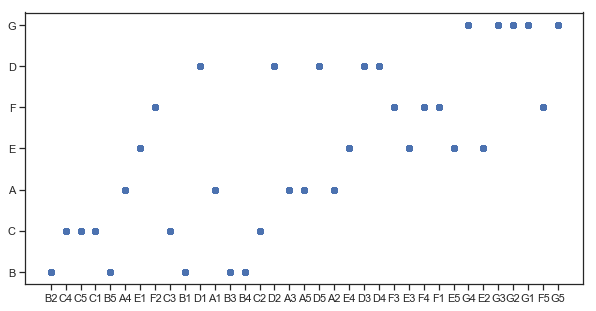

In [205]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

plt.scatter(data2['sub_grade'], data2['grade'])
plt.show()

In [206]:
len(data1.columns)

37

In [207]:
data1.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [208]:
check_list = ['acc_now_delinq','collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs','funded_amnt', 
             'funded_amnt_inv', 'inq_last_6mths', 'last_credit_pull_d','last_pymnt_amnt', 'last_pymnt_d','out_prncp', 
             'out_prncp_inv', 'pymnt_plan','next_pymnt_d','recoveries','tot_coll_amt', 'tot_cur_bal','total_pymnt', 'total_pymnt_inv', 
             'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'total_rev_hi_lim']

In [209]:
check1=[]
for c in list(data1):
    if(c in check_list):
        check1.append(c)

In [210]:
check1

['pymnt_plan',
 'delinq_2yrs',
 'inq_last_6mths',
 'out_prncp',
 'total_pymnt',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [211]:
data1[check1].head()

,pymnt_plan,delinq_2yrs,inq_last_6mths,out_prncp,total_pymnt,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,n,0.0,1.0,0.0,5861.071414,861.07,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,0.0,NaN,NaN,NaN
1,n,0.0,5.0,0.0,1008.710000,435.17,0.00,117.08,Apr-2013,119.66,NaN,Sep-2013,0.0,0.0,NaN,NaN,NaN
2,n,0.0,2.0,0.0,3003.653644,603.65,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,0.0,NaN,NaN,NaN
3,n,0.0,1.0,0.0,12226.302212,2209.33,16.97,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,0.0,NaN,NaN,NaN
4,n,0.0,0.0,766.9,3242.170000,1009.07,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,0.0,NaN,NaN,NaN


In [212]:
from datetime import datetime

pd.to_datetime(data2.last_pymnt_d).head(5)


0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-01-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [213]:
#data1=data1.drop('next_pymnt_d',axis=1)

In [214]:
df3=data1[['issue_d','last_pymnt_d','last_credit_pull_d','default_ind']].head(50)

In [215]:
df3

,issue_d,last_pymnt_d,last_credit_pull_d,default_ind
0,Dec-2011,Jan-2015,Jan-2016,0
1,Dec-2011,Apr-2013,Sep-2013,1
2,Dec-2011,Jun-2014,Jan-2016,0
3,Dec-2011,Jan-2015,Jan-2015,0
4,Dec-2011,Jan-2016,Jan-2016,0
5,Dec-2011,Jan-2015,Sep-2015,0
6,Dec-2011,Jan-2016,Jan-2016,0
7,Dec-2011,Jan-2015,Dec-2014,0
8,Dec-2011,Apr-2012,Aug-2012,1
9,Dec-2011,Nov-2012,Mar-2013,1


In [216]:
df3.issue_d=pd.to_datetime(df3.issue_d)
df3.last_pymnt_d=pd.to_datetime(df3.last_pymnt_d)
df3.last_credit_pull_d=pd.to_datetime(df3.last_credit_pull_d)

In [217]:
df3

,issue_d,last_pymnt_d,last_credit_pull_d,default_ind
0,2011-12-01,2015-01-01,2016-01-01,0
1,2011-12-01,2013-04-01,2013-09-01,1
2,2011-12-01,2014-06-01,2016-01-01,0
3,2011-12-01,2015-01-01,2015-01-01,0
4,2011-12-01,2016-01-01,2016-01-01,0
5,2011-12-01,2015-01-01,2015-09-01,0
6,2011-12-01,2016-01-01,2016-01-01,0
7,2011-12-01,2015-01-01,2014-12-01,0
8,2011-12-01,2012-04-01,2012-08-01,1
9,2011-12-01,2012-11-01,2013-03-01,1


In [218]:
df3['gap']=df3.last_pymnt_d-df3.issue_d

In [219]:
df3.sort_values('default_ind')

,issue_d,last_pymnt_d,last_credit_pull_d,default_ind,gap
0,2011-12-01,2015-01-01,2016-01-01,0,1127 days
25,2011-12-01,2012-09-01,2012-09-01,0,275 days
28,2011-12-01,2013-04-01,2016-01-01,0,487 days
29,2011-12-01,2014-12-01,2015-01-01,0,1096 days
30,2011-12-01,2015-01-01,2014-12-01,0,1127 days
31,2011-12-01,2013-08-01,2015-10-01,0,609 days
32,2011-12-01,2016-01-01,2016-01-01,0,1492 days
33,2011-12-01,2015-01-01,2016-01-01,0,1127 days
34,2011-12-01,2015-01-01,2014-12-01,0,1127 days
35,2011-12-01,2015-01-01,2014-12-01,0,1127 days


# gap is the difference between last_pymnt_d and issue_d...I found above the difference of 950 we have less defaulters

In [220]:
data1['gap']=pd.to_datetime(data1.last_pymnt_d)-pd.to_datetime(data1.issue_d)

In [221]:
#don't drop dates

In [222]:
#data1=data1.drop(['last_pymnt_d','last_credit_pull_d'],axis=1)

In [223]:
data1.shape

(855969, 38)

In [224]:
data1.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind', 'gap'],
      dtype='object')

In [225]:
data1.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              11
home_ownership           6
verification_status      3
issue_d                103
pymnt_plan               2
purpose                 14
addr_state              51
inq_last_6mths           9
initial_list_status      2
last_pymnt_d            97
next_pymnt_d             3
last_credit_pull_d     102
application_type         2
acc_now_delinq           8
default_ind              2
dtype: int64

In [226]:
data1.issue_d.isnull().sum()

0

# outlier removal

In [227]:
def outliers_iqr(df):
    import numpy as np
    for cols in list(df):
        if(df[cols].dtype!='object'):
            q1=np.percentile(df[cols],25)
            q3=np.percentile(df[cols],75)
            upper=q3+1.5*(q3-q1)
            lower=q1-1.5*(q3-q1)
            df[cols]=np.where(df[cols]>upper,upper,df[cols])
            df[cols]=np.where(df[cols]<lower,lower,df[cols])
    return(df)

In [228]:
data_f=outliers_iqr(data1)

In [233]:
data_f.to_csv('outlier_corrected_data1.csv',index=False)

In [116]:
data1.gap.head()

0   1127 days
1    487 days
2    913 days
3   1127 days
4   1218 days
Name: gap, dtype: timedelta64[ns]

In [231]:
data_f.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'default_ind', 'gap'],
      dtype='object')